In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
from tslearn.metrics import dtw, cdist_dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, average, complete
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.covariance import LedoitWolf
import datetime 
import math
from sklearn.covariance import LedoitWolf
from sklearn.decomposition import PCA
from sklearn import preprocessing
from datetime import timedelta

**Lets load in the data.**

Load in the ETF return data and index return data

In [2]:
ETF_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEWERdates.csv", index_col=0)

In [3]:
Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data_NEWERdates.csv",index_col=0)

In [4]:
ETF_data.head()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.000092,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.016010,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,0.003689,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.059568,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.052510,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111


In [5]:
Index_data.head(5)

,AsiaSMALL LoBO,AsiaME1 BO2,AsiaME1 BO3,AsiaME1 BO4,AsiaSMALL HiBO,AsiaME2 BO1,AsiaME2 BO2,AsiaME2 BO3,AsiaME2 BO4,AsiaME2 BO5,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2013-11-20,0.008958,0.010674,0.006974,0.006130,0.021649,0.005035,0.029283,-0.001502,-0.002688,0.007838,...,0.012978,0.013588,0.014134,0.000721,0.000255,0.000114,0.000416,0.000807,-0.000675,0.000596
2013-11-27,-0.024176,-0.017898,-0.015373,-0.035863,-0.024114,-0.027038,-0.014162,-0.027674,-0.035042,-0.038529,...,0.014366,0.042815,0.013392,-0.003319,0.002155,0.000398,0.000580,0.001456,0.003252,0.004738
2013-12-04,-0.006209,0.023451,-0.003439,-0.010837,-0.010588,-0.005128,0.039530,-0.001245,-0.007628,-0.037184,...,-0.014749,-0.003130,-0.012510,-0.009303,-0.005663,-0.001704,-0.004075,-0.006081,-0.008496,-0.008420
2013-12-11,-0.012165,-0.023670,-0.022509,-0.020266,-0.021941,-0.016033,-0.029136,-0.014855,-0.015754,-0.014654,...,-0.020950,-0.018947,-0.021841,-0.021065,0.002710,0.000398,0.001061,0.002087,0.003003,0.006452
2013-12-18,-0.005637,-0.002575,0.002844,-0.004460,-0.020650,0.013427,0.004084,-0.004898,0.012745,-0.014383,...,0.018238,0.047257,0.050895,0.026891,-0.000936,0.000114,-0.000591,-0.001249,-0.001675,-0.001480


The indexes are objects and we need to change them to daytime

In [6]:
ETF_data.index = pd.to_datetime(ETF_data.index, yearfirst=True)

In [7]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [8]:
joined = ETF_data.join(Index_data)

In [9]:
joined

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.007661,-0.008260,0.001517,0.005168,0.003626,-0.000056,0.000381,0.001109,0.003562,0.010203
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.020985,-0.021133,-0.016002,-0.012500,0.002894,-0.000056,0.000489,0.001491,0.003176,0.007490
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.000254,-0.004398,0.001961,0.005572,0.001167,-0.000336,0.000077,0.000938,0.002085,0.002663
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.052006,-0.056164,-0.062589,-0.042066,-0.004158,-0.001175,-0.003055,-0.004442,-0.004556,-0.006895
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.063258,0.076020,0.035589,0.041156,-0.001280,-0.000168,-0.000117,-0.000121,-0.000945,-0.003821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,0.047636,0.014823,0.030936,0.013988,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
joined.index.dtype

dtype('<M8[ns]')

**Define a start and an enddate and delete the bond indexes as they do not have new data.**

In [11]:
startdate = "2014-09-24"
enddate = "2020-04-02" 

joined = joined[joined.index < enddate]
joined = joined[joined.index > startdate]

joined = joined.iloc[:,:-6]

**Lets create a function to that takes in return series, calculates the clustering, picks up subset of assets based on Sharpe Ratio, Mediod and STARR ratio and prints out a vector with the clustering and subset of assets. The function also calculates the PDI score and the average correlation in the subset.**

In [12]:
def clustering(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 3, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:3].index.tolist())
    
    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 3, criterion="maxclust"), PDI, average_corr, noETFs

**Testing the function.**

In [13]:
beginning = "2014-09-23" 
startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*0) #this is the startdate of the 97 week period
enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97) 
newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]

In [14]:
newlist, newlist2, PDI, average_corr, noETFs = clustering(newdataframe)

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


**Now we apply the function rolling through different timeperiods and save the clustering into a dataframe.**

Each timeperiod is 97 weeks and moves forward 12 weeks at a time.

# 3 Clusters

## 3x3

In [15]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset = pd.DataFrame(index=np.arange(27))
cluster_df = pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering(newdataframe)
    subset[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = subset_assets
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key w

In [16]:
# Create dataframes to store values for PDI, average corr and no_ETFs
PDI_df = pd.DataFrame(index = cluster_df.columns)
Corr_df = pd.DataFrame(index = cluster_df.columns)
noETFs_df = pd.DataFrame(index = cluster_df.columns)

#Fill up the first column of the dataframes
PDI_df["3X3"] = PDI_list
Corr_df["3X3"] = average_corr_list
noETFs_df["3X3"] = noETFs_list

**Save the dataframes to a csv file.**

In [17]:
subset.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets3_3.csv")

In [18]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters3_3.csv")

## 3x4

In [19]:
def clustering(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 3, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:4].index.tolist())
    
    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 3, criterion="maxclust"), PDI, average_corr, noETFs

In [20]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset = pd.DataFrame(index=np.arange(36))
cluster_df = pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering(newdataframe)
    subset[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = subset_assets
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key w

In [21]:
#Fill up the first column of the dataframes
PDI_df["3X4"] = PDI_list
Corr_df["3X4"] = average_corr_list
noETFs_df["3X4"] = noETFs_list

**Save the dataframes to a csv file.**

In [22]:
subset.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets3_4.csv")

In [23]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters3_4.csv")

## 3x5

In [24]:
def clustering(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 3, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:5].index.tolist())
    
    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 3, criterion="maxclust"), PDI, average_corr, noETFs

In [25]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset = pd.DataFrame(index=np.arange(45))
cluster_df = pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering(newdataframe)
    subset[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = subset_assets
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key w

In [26]:
#Fill up the first column of the dataframes
PDI_df["3X5"] = PDI_list
Corr_df["3X5"] = average_corr_list
noETFs_df["3X5"] = noETFs_list

**Save the dataframes to a csv file.**

In [27]:
subset.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets3_5.csv")

In [28]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters3_5.csv")

# Cluster 4

## 4x3

In [29]:
def clustering4(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 4, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==4]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 4
    Cluster4_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 4].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster4 = distance_corr.loc[Cluster4_ETFs, Cluster4_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster4.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster4_ETFs].sort_values()[:3].index.tolist())
    
    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 4, criterion="maxclust"), PDI, average_corr, noETFs

In [30]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset =  []
cluster_df= pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering4(newdataframe)
    subset.append(subset_assets)
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

In [31]:
#Fill up the first column of the dataframes
PDI_df["4X3"] = PDI_list
Corr_df["4X3"] = average_corr_list
noETFs_df["4X3"] = noETFs_list

In [32]:
subset_df = pd.DataFrame.from_records(subset).transpose()#.rename(columns=dates)

# change the axis, the date is 6 days after the last date of the training priod
subset_df.columns = PDI_df.index


**Save the dataframes to a csv file.**

In [33]:
subset_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets4_3.csv")

In [34]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters4_3.csv")


## 4x4

In [35]:
def clustering4(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 4, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==4]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 4
    Cluster4_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 4].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster4 = distance_corr.loc[Cluster4_ETFs, Cluster4_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster4.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster4_ETFs].sort_values()[:4].index.tolist())
    
    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 4, criterion="maxclust"), PDI, average_corr, noETFs

In [36]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset =  []
cluster_df= pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering4(newdataframe)
    subset.append(subset_assets)
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

In [37]:
#Fill up the first column of the dataframes
PDI_df["4X4"] = PDI_list
Corr_df["4X4"] = average_corr_list
noETFs_df["4X4"] = noETFs_list

In [38]:
subset_df = pd.DataFrame.from_records(subset).transpose()#.rename(columns=dates)

# change the axis, the date is 6 days after the last date of the training priod
subset_df.columns = PDI_df.index


**Save the dataframes to a csv file.**

In [39]:
subset_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets4_4.csv")

In [40]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters4_4.csv")


## 4x5

In [41]:
def clustering4(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 4, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==4]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 4
    Cluster4_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 4].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster4 = distance_corr.loc[Cluster4_ETFs, Cluster4_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster4.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster4_ETFs].sort_values()[:5].index.tolist())
    
    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 4, criterion="maxclust"), PDI, average_corr, noETFs

In [42]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset =  []
cluster_df= pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering4(newdataframe)
    subset.append(subset_assets)
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key w

In [43]:
#Fill up the first column of the dataframes
PDI_df["4X5"] = PDI_list
Corr_df["4X5"] = average_corr_list
noETFs_df["4X5"] = noETFs_list

In [44]:
subset_df = pd.DataFrame.from_records(subset).transpose()#.rename(columns=dates)

# change the axis, the date is 6 days after the last date of the training priod
subset_df.columns = PDI_df.index


**Save the dataframes to a csv file.**

In [45]:
subset_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets4_5.csv")

In [46]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters4_5.csv")

# 5 clusters

## 5x3

In [47]:
def clustering5(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 5, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==4]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==5]["Sharpe Ratio"].sort_values()[-3:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 4
    Cluster4_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 4].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster4 = distance_corr.loc[Cluster4_ETFs, Cluster4_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster4.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 5
    Cluster5_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 5].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster5 = distance_corr.loc[Cluster5_ETFs, Cluster5_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster5.sum(axis=0).sort_values()[:3].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster4_ETFs].sort_values()[:3].index.tolist())
    Reps.append(STARR.loc[Cluster5_ETFs].sort_values()[:3].index.tolist())

    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 5, criterion="maxclust"), PDI, average_corr, noETFs

In [48]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset= []
cluster_df= pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering5(newdataframe)
    subset.append(subset_assets)
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

In [49]:
#Fill up the first column of the dataframes
PDI_df["5X3"] = PDI_list
Corr_df["5X3"] = average_corr_list
noETFs_df["5X3"] = noETFs_list

In [50]:
subset_df = pd.DataFrame.from_records(subset).transpose()#.rename(columns=dates)

# change the axis, the date is 6 days after the last date of the training priod
subset_df.columns = PDI_df.index

**Save the dataframes to a csv file.**

In [51]:
subset_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets5_3.csv")

In [52]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters5_3.csv")


## 5x4

In [53]:
def clustering5(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 5, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==4]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==5]["Sharpe Ratio"].sort_values()[-4:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 4
    Cluster4_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 4].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster4 = distance_corr.loc[Cluster4_ETFs, Cluster4_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster4.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 5
    Cluster5_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 5].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster5 = distance_corr.loc[Cluster5_ETFs, Cluster5_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster5.sum(axis=0).sort_values()[:4].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster4_ETFs].sort_values()[:4].index.tolist())
    Reps.append(STARR.loc[Cluster5_ETFs].sort_values()[:4].index.tolist())

    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 5, criterion="maxclust"), PDI, average_corr, noETFs

In [54]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset= []
cluster_df= pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering5(newdataframe)
    subset.append(subset_assets)
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

In [55]:
#Fill up the first column of the dataframes
PDI_df["5X4"] = PDI_list
Corr_df["5X4"] = average_corr_list
noETFs_df["5X4"] = noETFs_list

In [56]:
subset_df = pd.DataFrame.from_records(subset).transpose()#.rename(columns=dates)

# change the axis, the date is 6 days after the last date of the training priod
subset_df.columns = PDI_df.index

**Save the dataframes to a csv file.**

In [57]:
subset_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets5_4.csv")

In [58]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters5_4.csv")


## 5x5

In [59]:
def clustering5(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    distance_corr = 1-corr 
    con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure
    
    #create a dataframe and save the clustering to the dataframe
    cluster_df = pd.DataFrame(index=joined.columns)
    cluster_df["clusters"] = fcluster(complete_corr, 5, criterion="maxclust")
   

    # Get the representatives based on Sharpe Ratio
    # Calculate the return for the assets on this given period
    valueslist=[]

    for i in range(0, returnassets.shape[1]):
        counter = 0
        value=1
        for j in range(1,returnassets.shape[0]):
            value=value*(returnassets.iloc[j,i]+1)
            counter=counter+1
        
        valueslist.append((1+value**(1/counter)-1)**52-1)
    
    cluster_df["Ret"]=valueslist
    
    # Calculate the standard deviation for each asset in the given period
    cluster_df["Std"] = returnassets.std()*math.sqrt(52)

    # Calculate the Sharpe Ratio for each asset
    cluster_df["Sharpe Ratio"] = cluster_df["Ret"]/cluster_df["Std"]
    
    Reps = []
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==1]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==2]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==3]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==4]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    Reps.append(cluster_df.iloc[:537][cluster_df["clusters"]==5]["Sharpe Ratio"].sort_values()[-5:].index.tolist())
    
    
    # Get the representatives based on the mediod
    # cluster 1
    Cluster1_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 1].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster1.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 2
    Cluster2_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 2].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster2.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 3
    Cluster3_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 3].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster3.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 4
    Cluster4_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 4].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster4 = distance_corr.loc[Cluster4_ETFs, Cluster4_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster4.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    # cluster 5
    Cluster5_ETFs = cluster_df.iloc[:537][cluster_df["clusters"] == 5].index.tolist() #save the names of ETFs in cluster 1
    distance_corr_cluster5 = distance_corr.loc[Cluster5_ETFs, Cluster5_ETFs] #create a distance matrix for only these ETFs
    Reps.append(distance_corr_cluster5.sum(axis=0).sort_values()[:5].index.tolist()) #sum over the rows/columns and find the three lowest values and add them to the list
    
    
    # Get the representatives based on the STARR ratio
    #calculate
    VaR = joined.quantile(0.05, axis=0, interpolation = "higher")
    CVaR = joined[joined.lt(VaR, axis=1)].mean().iloc[:537]
    STARR = cluster_df["Ret"].iloc[:537]/CVaR
    
    Reps.append(STARR.loc[Cluster1_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster2_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster3_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster4_ETFs].sort_values()[:5].index.tolist())
    Reps.append(STARR.loc[Cluster5_ETFs].sort_values()[:5].index.tolist())

    #flatten the list 
    Reps_flat=[]
    for sublist in Reps:
        for i in sublist:
            Reps_flat.append(i)
            
            
    #Create a corrsubset dataframe which only includes the ETFs from the subset
    corrsubset = corr.loc[corr.index.isin(Reps_flat), corr.columns.isin(Reps_flat)]
    
    #calculate the avergae correlation
    average_corr = corrsubset.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corrsubset)

    value = 0
    for i in range(1, corrsubset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1
    
    #save the length of the correlation matrix to know how many disjoint ETFs are in the subset
    noETFs=corrsubset.shape[1]
    
    return Reps_flat, fcluster(complete_corr, 5, criterion="maxclust"), PDI, average_corr, noETFs

In [60]:
beginning = "2014-09-23"  # this is the first date of the dataframe

# create a empty dataframe
subset= []
cluster_df= pd.DataFrame(index=joined.columns)
PDI_list=[]
average_corr_list=[]
noETFs_list = []

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)]
    
    subset_assets, clusters, PDI, average_corr, noETFs = clustering5(newdataframe)
    subset.append(subset_assets)
    cluster_df[(enddate-timedelta(days=6)).strftime("%Y/%m/%d")] = clusters 
    PDI_list.append(PDI)
    average_corr_list.append(average_corr)
    noETFs_list.append(noETFs)
    

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key w

In [61]:
#Fill up the first column of the dataframes
PDI_df["5X5"] = PDI_list
Corr_df["5X5"] = average_corr_list
noETFs_df["5X5"] = noETFs_list

In [62]:
subset_df = pd.DataFrame.from_records(subset).transpose()#.rename(columns=dates)

# change the axis, the date is 6 days after the last date of the training priod
subset_df.columns = PDI_df.index

**Save the dataframes to a csv file.**

In [63]:
subset_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-subsets5_5.csv")

In [64]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-clusters5_5.csv")

# Plot figures of the measures

**Plot the PDI development.**

In [49]:
joined.iloc[:,:537]

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,AsiaSMALL LoBO
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955,0.003302
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946,-0.037883
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249,0.007265
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257,-0.019080
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111,0.001538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,-0.033749,0.005904,-0.101279,0.014548,-0.080613,-0.045740,-0.005204,-0.087854,0.029114,0.038170
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,0.111403,0.122347,0.343638,0.093997,0.166562,0.158091,0.096242,0.117873,0.000741,NaN
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,0.010119,-0.019038,-0.028850,0.020767,0.016456,0.004551,-0.023244,-0.016637,0.021388,NaN
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,0.018842,-0.014022,0.121053,0.026635,0.015008,0.022715,-0.012624,-0.012983,0.024358,NaN


In [12]:
def PDI(returnassets):   
    #calculate the correlation distance
    corr = returnassets.corr(method="spearman") 
    
    #calculate the avergae correlation
    average_corr = corr.mean().mean()
    
    #calculate the PDI index
    pca = PCA()
    pca.fit(corr)

    value = 0
    for i in range(1, corr.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    
    PDI = 2*value - 1

    
    return PDI, average_corr

In [13]:
beginning = "2014-09-23"  # this is the first date of the dataframe

PDI_list=[]
average_corr_list=[]

for i in range(0,17):
    startdate = pd.to_datetime(beginning)+pd.DateOffset(weeks=12*i) # this is the startdate of the 97 week period
    enddate = pd.to_datetime(startdate)+pd.DateOffset(weeks=97)  # this is the enddate of the 97 week period

    newdataframe = joined[(joined.index < enddate) & (joined.index > startdate)].iloc[:,:537]
    
    PDI_value, average_corr = PDI(newdataframe)
    PDI_list.append(PDI_value)
    average_corr_list.append(average_corr)

In [14]:
plt.figure(figsize=(20,15))
PDI_df.plot(kind="line")
plt.title("PDI")
#plt.legend(["ETF"],["Index"])
#plt.ylabel("Return [%]", fontsize=16)
#plt.xlabel("Standard Deviation", fontsize =16)
plt.show()


NameError: name 'PDI_df' is not defined

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Average Correlation')

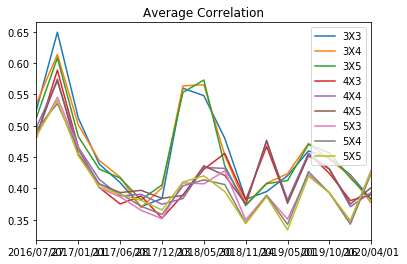

In [68]:
Corr_df.plot(kind="line")
plt.title("Average Correlation")

In [1]:
noETFs_df.plot(kind="line")
plt.title("No of ETFs")

NameError: name 'noETFs_df' is not defined

# read in the data so we don't have to run the whole notebook

In [15]:
corr_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-Corr_df.csv", index_col=0)
PDI_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-PDI.csv", index_col=0)
noETFs_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/ClusteringTesting/out-noETFs.csv", index_col=0)


In [16]:
corr_data.index = pd.to_datetime(corr_data.index, yearfirst=True)
PDI_data.index = pd.to_datetime(PDI_data.index, yearfirst=True)
noETFs_data.index = pd.to_datetime(noETFs_data.index, yearfirst=True)

In [17]:
PDI_data["All ETFs"] = PDI_list
corr_data["All ETFs"] = average_corr_list


<Figure size 1440x1080 with 0 Axes>

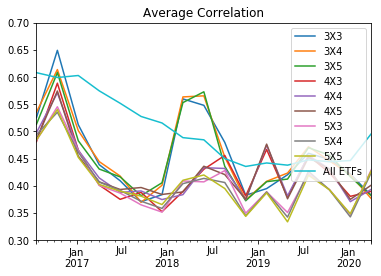

In [21]:
plt.figure(figsize=(20,15))
corr_data.plot(kind="line")
plt.title("Average Correlation")
#plt.legend(["ETF"],["Index"])
#plt.ylabel("Return [%]", fontsize=16)
#plt.xlabel("Standard Deviation", fontsize =16)
plt.ylim(0.3,0.7)
plt.show()



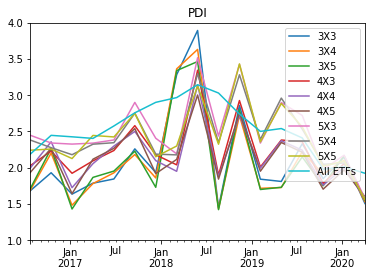

In [25]:
PDI_data.plot(kind="line")
plt.title("PDI")
plt.legend(loc="upper right")
#plt.ylabel("Return [%]", fontsize=16)
#plt.xlabel("Standard Deviation", fontsize =16)
plt.ylim(1,4)
plt.show()


In [ ]:
noETFs_data.plot(kind="line")
plt.title("No of ETFs")
#plt.legend(["ETF"],["Index"])
#plt.ylabel("Return [%]", fontsize=16)
#plt.xlabel("Standard Deviation", fontsize =16)
#plt.ylim(1,9)
plt.show()
